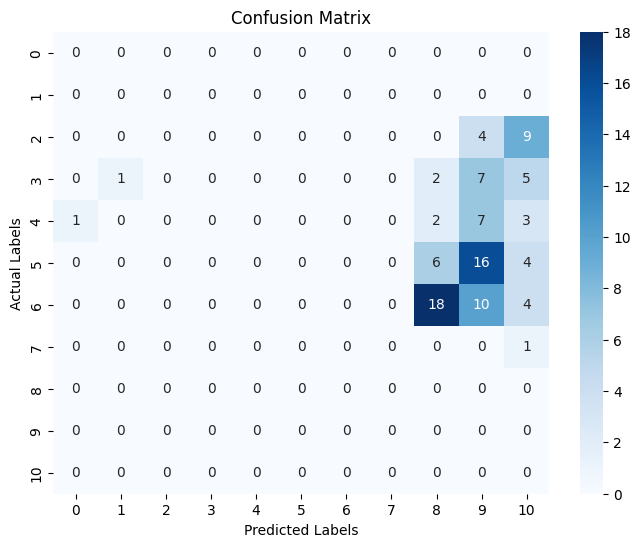

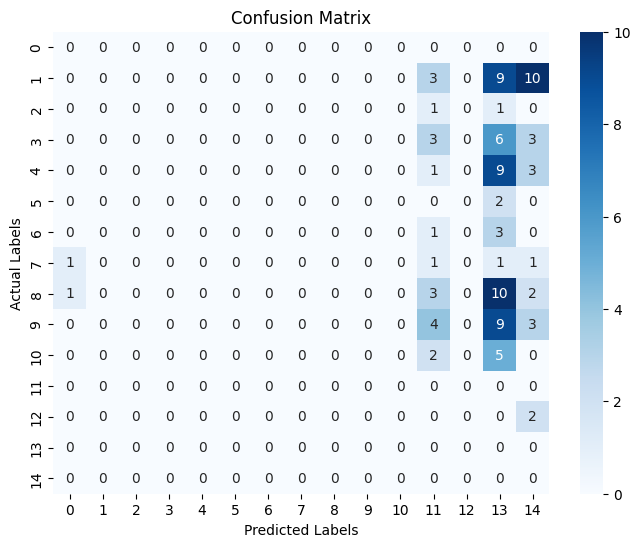

Cohen's Kappa for dataset 1: 0.0
Cohen's Kappa for dataset 2: 0.0


In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data

df1= pd.read_csv("100_biased.csv")
df2 = pd.read_csv("tweets_unbiased_labelled_GPT3_100.csv")


# Convert string labels to numerical labels
# Create a mapping dictionary to standardize labels
label_mapping = {
    'no verdict': 'no verdict',
    "'no verdict'": 'no verdict',
    "'true'": 'true',
    "'false'": 'false',
    'FALSE': 'false',
    'TRUE': 'true',
    'No verdict': 'no verdict',
    "No verdict": 'no verdict',
    'No verdict': 'no verdict',
    "TRUE": 'true',
    "FALSE": 'false',
    "True": 'true',
    "False": 'false',
}

# Apply the mapping dictionary to standardize labels in both datasets
df1['Fact assessment'] = df1['Fact assessment'].map(label_mapping).fillna(df1['Fact assessment'])
df2['Fact assessment'] = df2['Fact assessment'].map(label_mapping).fillna(df2['Fact assessment'])


# Convert numerical labels to string labels
df1['Toxicity'] = df1['Toxicity'].astype(str)
df2['Toxicity'] = df2['Toxicity'].astype(str)

# Step 2: Calculate Confusion Matrix
def calculate_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    return cm

# Step 3: Calculate Cohen's Kappa
def calculate_cohens_kappa(actual, predicted):
    kappa = cohen_kappa_score(actual, predicted)
    return kappa

# Step 4: Visualize Confusion Matrix
def visualize_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming df1 and df2 are your datasets
actual_labels_1 = df1['Toxicity']
predicted_labels_1 = df1['Fact assessment']
actual_labels_2 = df2['Toxicity']
predicted_labels_2 = df2['Fact assessment']

# Calculate confusion matrix
confusion_matrix_1 = calculate_confusion_matrix(actual_labels_1, predicted_labels_1)
confusion_matrix_2 = calculate_confusion_matrix(actual_labels_2, predicted_labels_2)

# Calculate Cohen's Kappa
kappa_1 = calculate_cohens_kappa(actual_labels_1, predicted_labels_1)
kappa_2 = calculate_cohens_kappa(actual_labels_2, predicted_labels_2)

# Visualize confusion matrix
visualize_confusion_matrix(confusion_matrix_1)
visualize_confusion_matrix(confusion_matrix_2)

# Print Cohen's Kappa coefficients
print("Cohen's Kappa for dataset 1:", kappa_1)
print("Cohen's Kappa for dataset 2:", kappa_2)
